In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


random.seed(10)

# Data exploration

## x_train set

In [2]:
path = os.path.dirname(os.path.abspath(__name__)) + "/../data/x_train.txt"
x_train = pd.read_csv(path, sep=" ", header=None)

In [5]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-2.619773,-2.619533,-1.199350,-1.083335,-1.000910,-0.366967,-2.164037,-1.210001,-0.658311,-1.489539,...,10.849925,10.343346,10.717519,7.709295,5.894554,12.416573,6.765269,16.243907,7.209524,8.082021
1,-1.415579,-1.782544,-2.880270,-1.958863,1.159968,0.273030,-1.628728,-0.175813,-0.916857,-0.570166,...,11.489417,5.195818,3.494627,5.529154,10.517576,15.697333,11.324938,12.187670,12.283861,5.032285
2,-2.745092,-1.382945,-1.626015,-1.282560,-0.663146,0.052349,-2.403322,-0.765073,-0.394354,-0.806624,...,13.934934,9.267515,4.705604,6.642557,14.658934,8.130767,7.194487,11.939354,11.653620,5.942778
3,0.618998,0.455364,-0.115081,0.649040,-0.862207,2.308504,0.526114,-1.094852,1.088656,-0.481210,...,12.021328,3.852231,11.059702,7.527268,7.253120,9.791136,6.089743,10.752796,5.778888,10.366363
4,-0.070694,-0.550509,-0.565556,-0.693065,-0.573089,-0.395862,0.003170,-0.981609,-0.505775,-0.758430,...,7.537788,11.229665,11.318915,6.622256,12.557882,5.520360,5.397359,13.152269,10.684779,9.816471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.106210,-1.958227,-2.073105,-0.827217,0.797188,-0.544141,-1.176375,0.577295,-1.037255,-0.691466,...,8.031879,7.656727,16.252868,10.527859,6.264553,6.922600,12.269030,8.614451,8.801470,6.046766
4996,-3.203265,-3.604215,-1.303455,-1.769853,-3.093612,-3.293880,-3.031679,-3.727836,-2.351449,-2.562465,...,7.876297,6.453584,12.920065,4.730426,13.131292,8.244798,18.111135,8.575744,14.878834,11.100852
4997,-0.418994,-3.164231,-1.057789,-1.414368,0.495049,-1.455748,-1.530525,0.155972,-1.831778,-3.139882,...,6.924993,9.757964,18.191785,14.979645,9.510120,5.661958,7.205565,7.264520,11.036341,11.274324
4998,2.291015,1.073697,0.071849,0.475785,1.203500,2.087545,2.393297,1.198370,0.695188,0.829632,...,6.169952,5.159071,14.761030,5.710403,12.064430,17.109394,10.432060,10.090096,19.415991,9.163934


Text(0, 0.5, 'Mean')

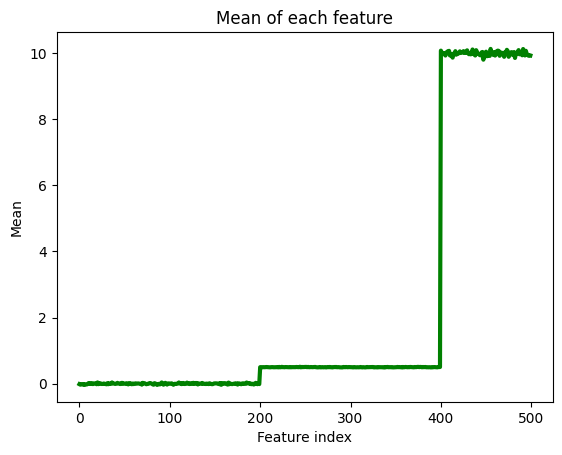

In [16]:
plt.plot(x_train.mean(), linewidth=3.0, color="green")
plt.title("Mean of each feature")
plt.xlabel("Feature index")
plt.ylabel("Mean")

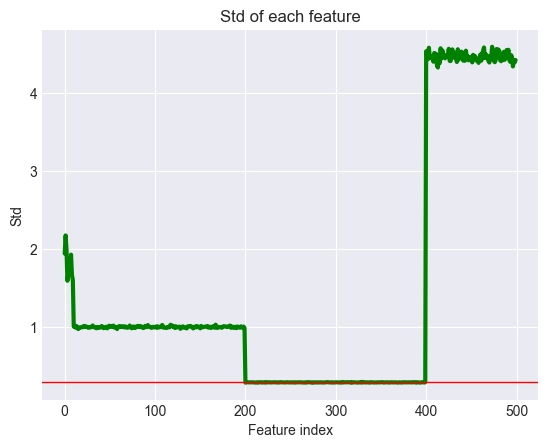

In [126]:
plt.plot(x_train.std(), linewidth=3.0, color="green")
plt.title("Std of each feature")
plt.xlabel("Feature index")
plt.ylabel("Std")
plt.axhline(
    y=1 / (2 * np.sqrt(3)), color="red", linewidth=1
)  # std of uniform distribution [0,1]

Text(0, 0.5, 'min')

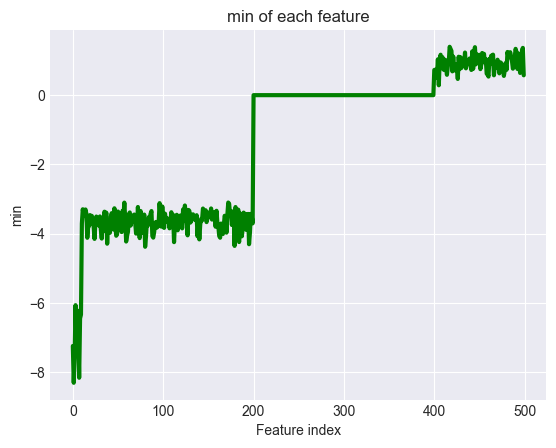

In [107]:
plt.plot(x_train.min(), linewidth=3.0, color="green")
plt.title("min of each feature")
plt.xlabel("Feature index")
plt.ylabel("min")

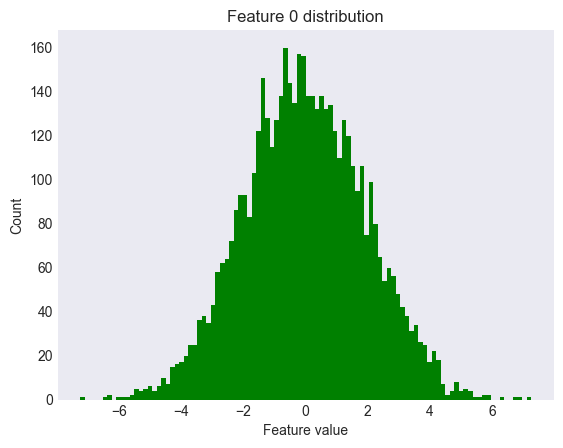

In [116]:
x_train[0].hist(bins=100, color="green")
plt.title("Feature 0 distribution")
plt.xlabel("Feature value")
plt.ylabel("Count")
plt.grid(False)

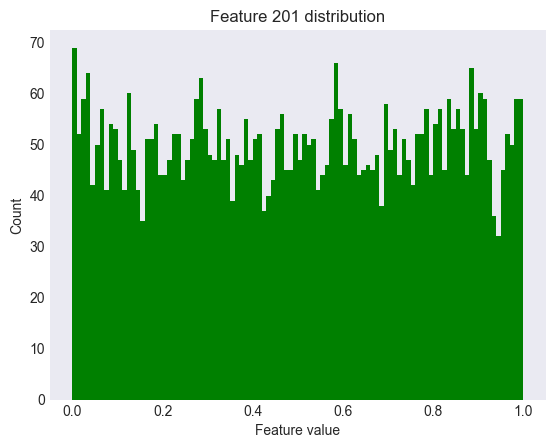

In [95]:
x_train[201].hist(bins=100, color="green")
plt.title("Feature 201 distribution")
plt.xlabel("Feature value")
plt.ylabel("Count")
plt.grid(False)

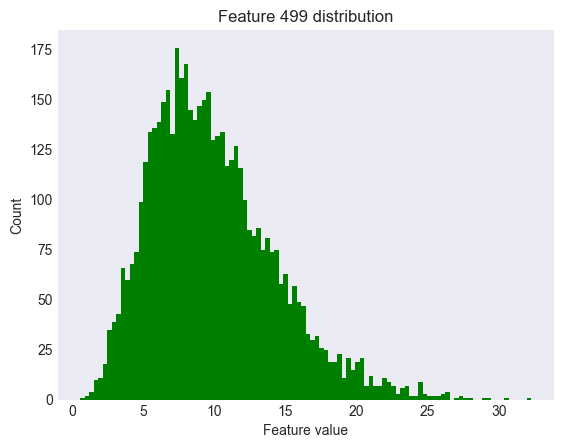

In [53]:
x_train[499].hist(bins=100, color="green")
plt.title("Feature 499 distribution")
plt.xlabel("Feature value")
plt.ylabel("Count")
plt.grid(False)

I think data is draw from 4 different distributions\
the first 200 features are drawn from a normal distribution\
but there is a twist\
the first 10 features have higher variance and are correlated to each other\
the next 200 features are drawn from a uniform distribution [0,1]\
the next 100 features are drawn from something that resembles a chi-squared distribution

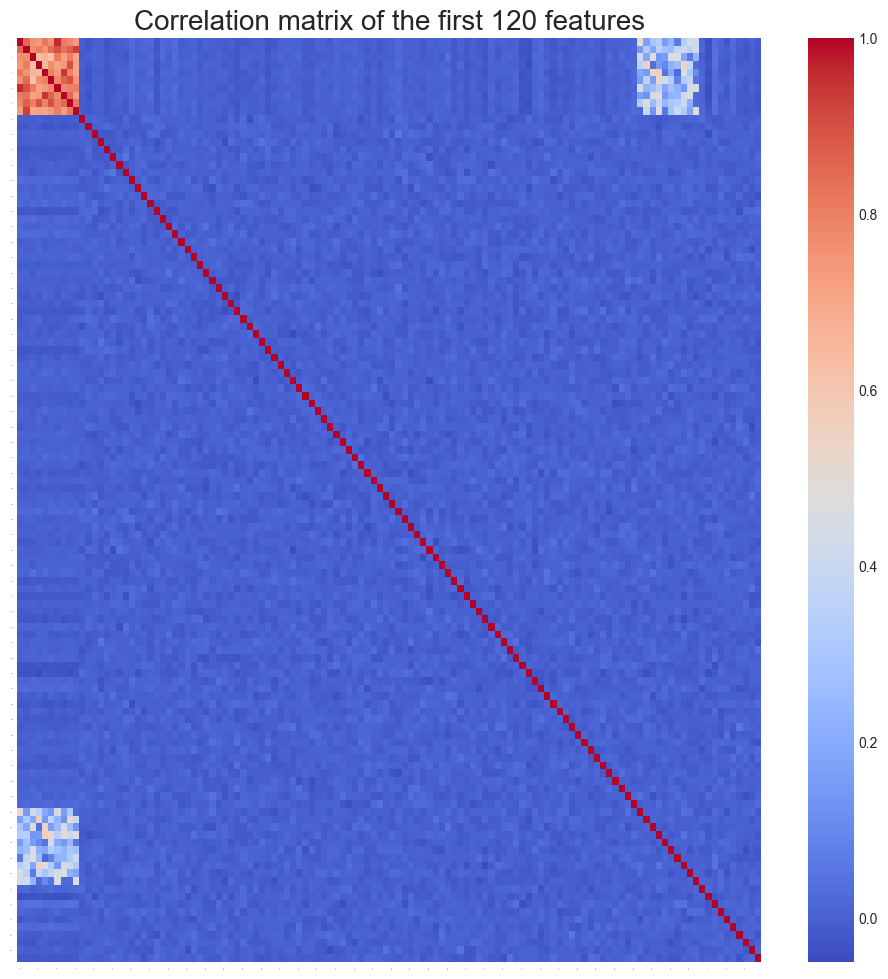

In [101]:
plt.figure(figsize=(12, 12))
sns.heatmap(x_train.iloc[:, 0:120].corr(), cmap="coolwarm")
plt.title("Correlation matrix of the first 120 features", fontsize=20)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)
plt.show()

## x_test set

In [133]:
path = os.path.dirname(os.path.abspath(__name__)) + "/../data/x_test.txt"
x_test = pd.read_csv(path, sep=" ", header=None)

Text(0, 0.5, 'Mean')

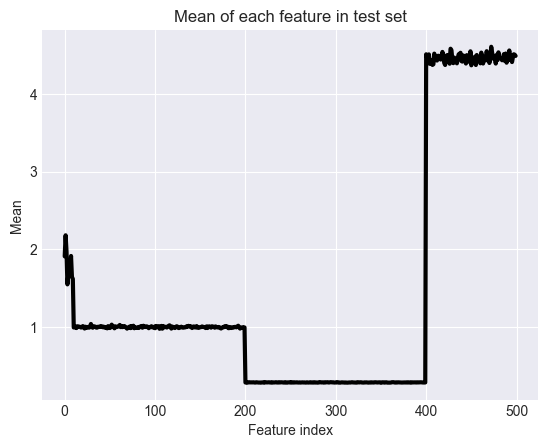

In [134]:
plt.plot(x_test.std(), linewidth=3.0, color="black")
plt.title("Mean of each feature in test set")
plt.xlabel("Feature index")
plt.ylabel("Mean")

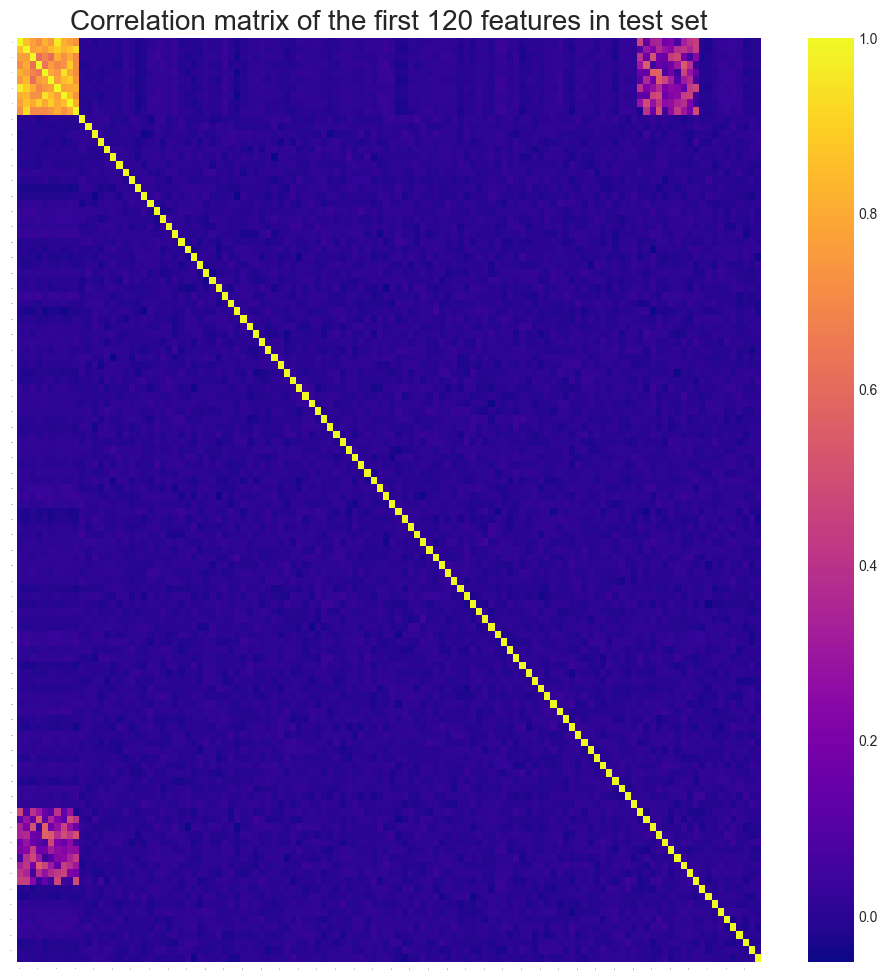

In [141]:
plt.figure(figsize=(12, 12))
sns.heatmap(x_test.iloc[:, 0:120].corr(), cmap="plasma")
plt.title("Correlation matrix of the first 120 features in test set", fontsize=20)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)
plt.show()

I don't want to jump into conclusions without further analysis, but it seems that the test set is generated from the same distribution as the training set, without any shift or change in the distribution of the features. This is a good thing, as it means that the model will (hopefully) perform as expected based on the validation set.

## y_train set

In [3]:
path = os.path.dirname(os.path.abspath(__name__)) + "/../data/y_train.txt"
y_train = pd.read_csv(path, sep=" ", header=None)

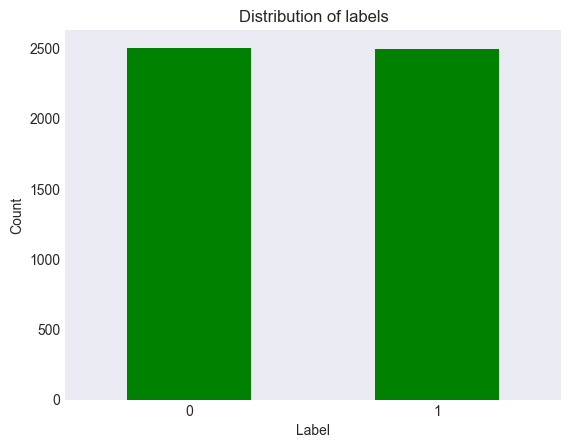

In [150]:
# make barplot of labels
y_train[0].value_counts().plot(kind="bar", color="green")
plt.title("Distribution of labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(False)

## combining x_train and y_train

In [4]:
y = y_train.copy()
y.columns = ["y"]
train = pd.concat([x_train, y], axis=1)
train

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,y
0,-2.619773,-2.619533,-1.199350,-1.083335,-1.000910,-0.366967,-2.164037,-1.210001,-0.658311,-1.489539,...,10.343346,10.717519,7.709295,5.894554,12.416573,6.765269,16.243907,7.209524,8.082021,0
1,-1.415579,-1.782544,-2.880270,-1.958863,1.159968,0.273030,-1.628728,-0.175813,-0.916857,-0.570166,...,5.195818,3.494627,5.529154,10.517576,15.697333,11.324938,12.187670,12.283861,5.032285,0
2,-2.745092,-1.382945,-1.626015,-1.282560,-0.663146,0.052349,-2.403322,-0.765073,-0.394354,-0.806624,...,9.267515,4.705604,6.642557,14.658934,8.130767,7.194487,11.939354,11.653620,5.942778,1
3,0.618998,0.455364,-0.115081,0.649040,-0.862207,2.308504,0.526114,-1.094852,1.088656,-0.481210,...,3.852231,11.059702,7.527268,7.253120,9.791136,6.089743,10.752796,5.778888,10.366363,1
4,-0.070694,-0.550509,-0.565556,-0.693065,-0.573089,-0.395862,0.003170,-0.981609,-0.505775,-0.758430,...,11.229665,11.318915,6.622256,12.557882,5.520360,5.397359,13.152269,10.684779,9.816471,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.106210,-1.958227,-2.073105,-0.827217,0.797188,-0.544141,-1.176375,0.577295,-1.037255,-0.691466,...,7.656727,16.252868,10.527859,6.264553,6.922600,12.269030,8.614451,8.801470,6.046766,1
4996,-3.203265,-3.604215,-1.303455,-1.769853,-3.093612,-3.293880,-3.031679,-3.727836,-2.351449,-2.562465,...,6.453584,12.920065,4.730426,13.131292,8.244798,18.111135,8.575744,14.878834,11.100852,0
4997,-0.418994,-3.164231,-1.057789,-1.414368,0.495049,-1.455748,-1.530525,0.155972,-1.831778,-3.139882,...,9.757964,18.191785,14.979645,9.510120,5.661958,7.205565,7.264520,11.036341,11.274324,0
4998,2.291015,1.073697,0.071849,0.475785,1.203500,2.087545,2.393297,1.198370,0.695188,0.829632,...,5.159071,14.761030,5.710403,12.064430,17.109394,10.432060,10.090096,19.415991,9.163934,0


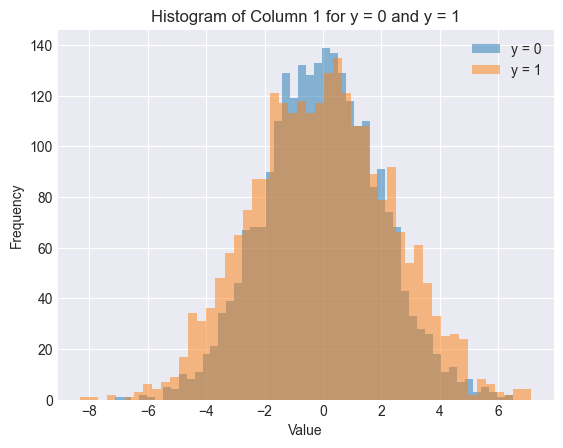

In [241]:
col = 1
plt.hist(train[train["y"] == 0][col], bins=50, alpha=0.5, label="y = 0")
plt.hist(train[train["y"] == 1][col], bins=50, alpha=0.5, label="y = 1")
plt.title(f"Histogram of Column {col} for y = 0 and y = 1")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

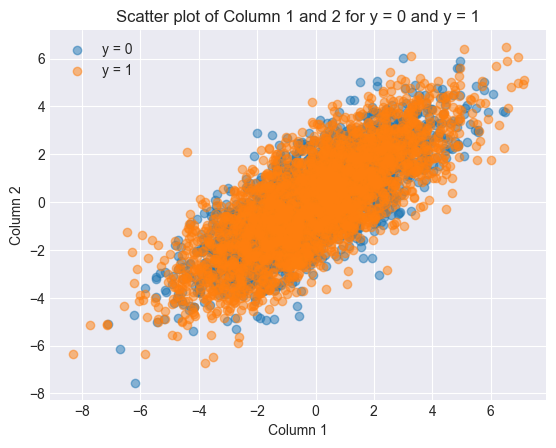

In [242]:
plt.scatter(
    train[train["y"] == 0][col],
    train[train["y"] == 0][col + 1],
    alpha=0.5,
    label="y = 0",
)
plt.scatter(
    train[train["y"] == 1][col],
    train[train["y"] == 1][col + 1],
    alpha=0.5,
    label="y = 1",
)
plt.title(f"Scatter plot of Column {col} and {col+1} for y = 0 and y = 1")
plt.xlabel(f"Column {col}")
plt.ylabel(f"Column {col+1}")
plt.legend()

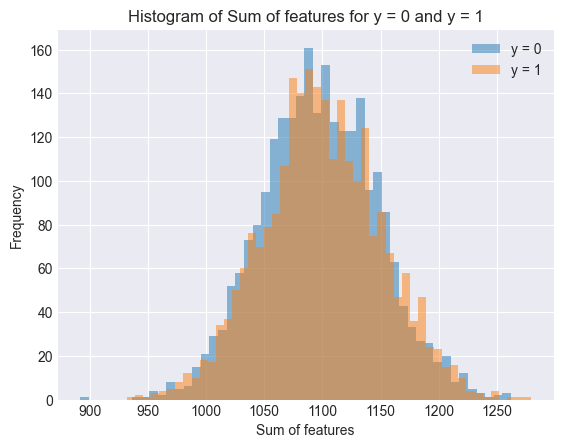

In [201]:
sum_of_features = x_train.sum(axis=1)
sum_of_features = pd.concat([sum_of_features, y], axis=1)
sum_of_features
plt.hist(
    sum_of_features[sum_of_features["y"] == 0][0], bins=50, alpha=0.5, label="y = 0"
)
plt.hist(
    sum_of_features[sum_of_features["y"] == 1][0],
    bins=50,
    alpha=0.5,
    label="y = 1",
)
plt.title(f"Histogram of Sum of features for y = 0 and y = 1")
plt.xlabel("Sum of features")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Text(0, 0.5, 'Correlation value')

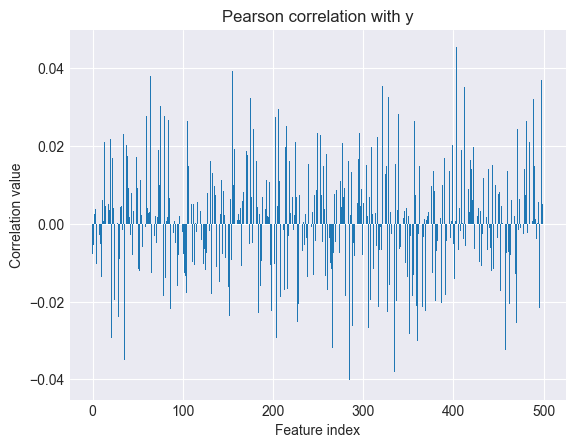

In [229]:
correlation = train.corr()["y"]
correlation = correlation.drop("y")  # Remove correlation with itself
plt.bar(correlation.index, correlation)
plt.title("Pearson correlation with y")
plt.xlabel("Feature index")
plt.ylabel("Correlation value")

plot for spearman correlation is very similar 

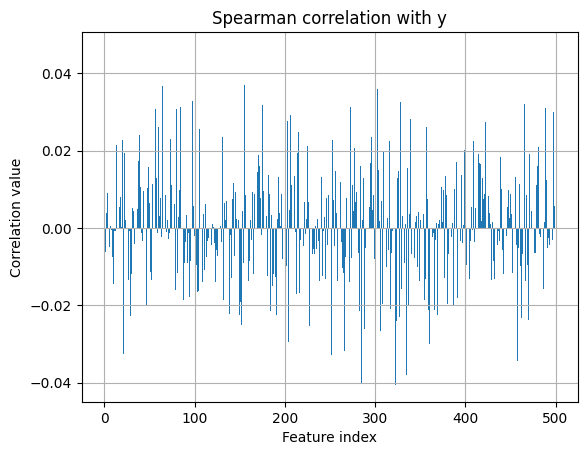

In [7]:
correlation = train.corr(method="spearman")["y"]
correlation = correlation.drop("y")  # Remove correlation with itself
plt.bar(correlation.index, correlation)
plt.title("Spearman correlation with y")
plt.xlabel("Feature index")
plt.ylabel("Correlation value")
plt.grid(True)

# Simple model on train

In [8]:
# Split the train dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train.drop("y", axis=1), train["y"], test_size=0.2, random_state=213
)

# Train a random forest model
rf_all = RandomForestClassifier(random_state=213, n_estimators=200, max_depth=10)
rf_all.fit(X_train, y_train)

# Validate the results
accuracy = rf_all.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.635


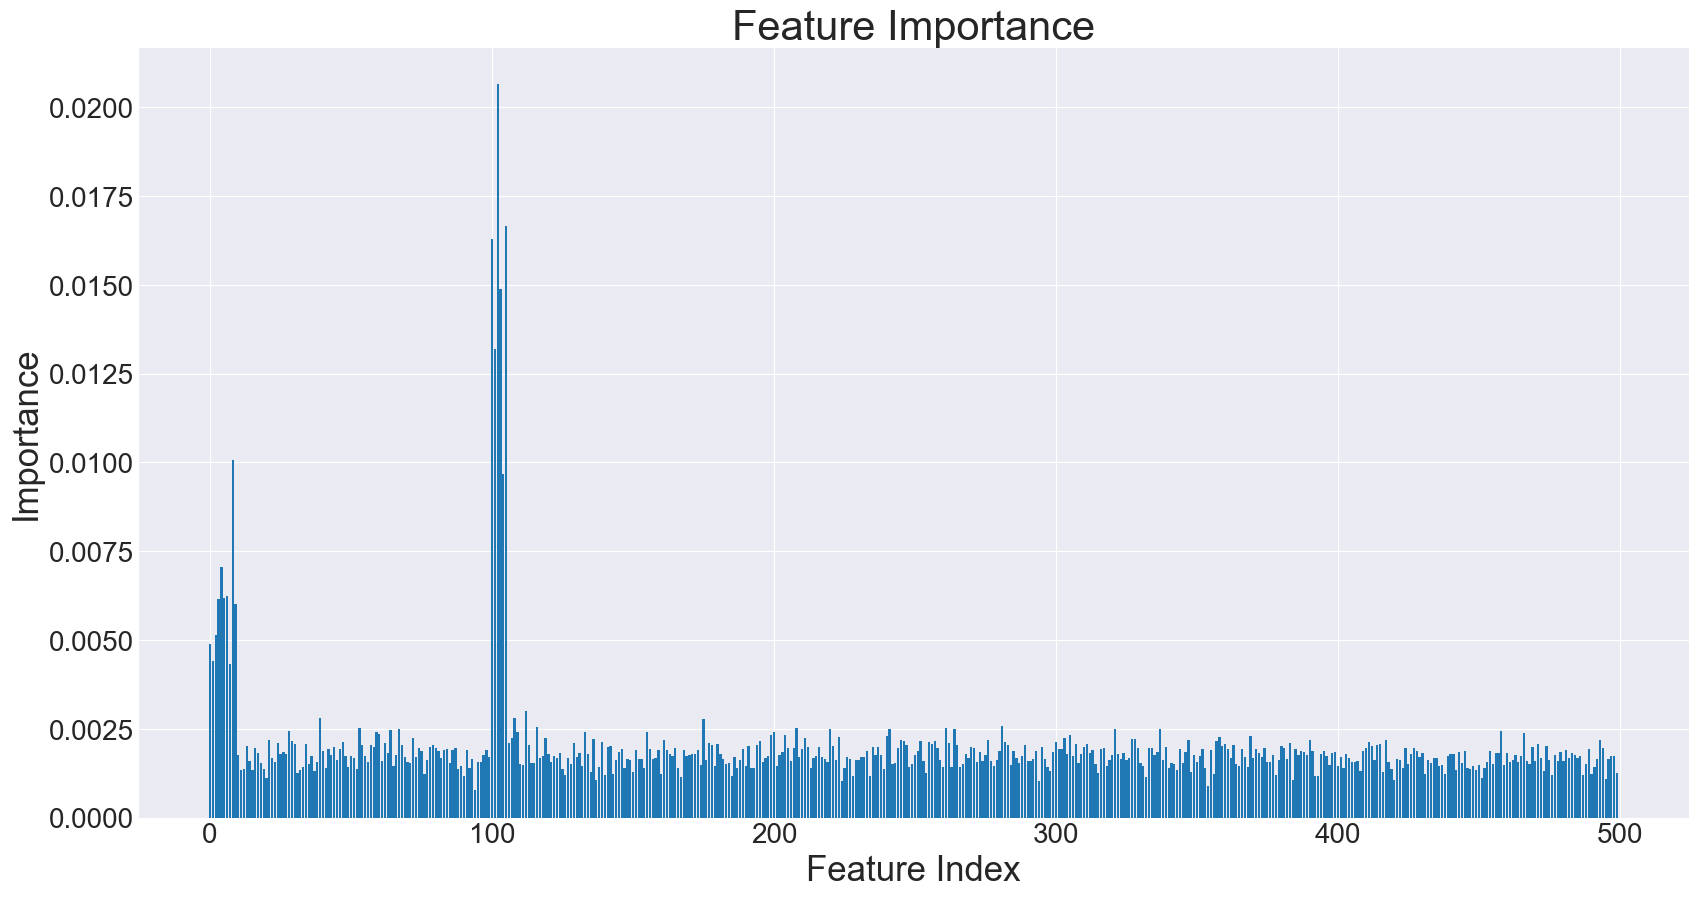

In [264]:
plt.figure(figsize=(20, 10))
importance = rf_all.feature_importances_
plt.bar(range(len(importance)), importance)
plt.title("Feature Importance", fontsize=30)
plt.xlabel("Feature Index", fontsize=25)
plt.ylabel("Importance", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## What will happened if i remove 380 variables with low feature importance?  

In [9]:
# Split the train dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train.iloc[:, 0:120], train["y"], test_size=0.2, random_state=213
)

# Train a random forest model
rf_first_120_features = RandomForestClassifier(random_state=213, n_estimators=200)
rf_first_120_features.fit(X_train, y_train)

# Validate the results
accuracy = rf_first_120_features.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.664


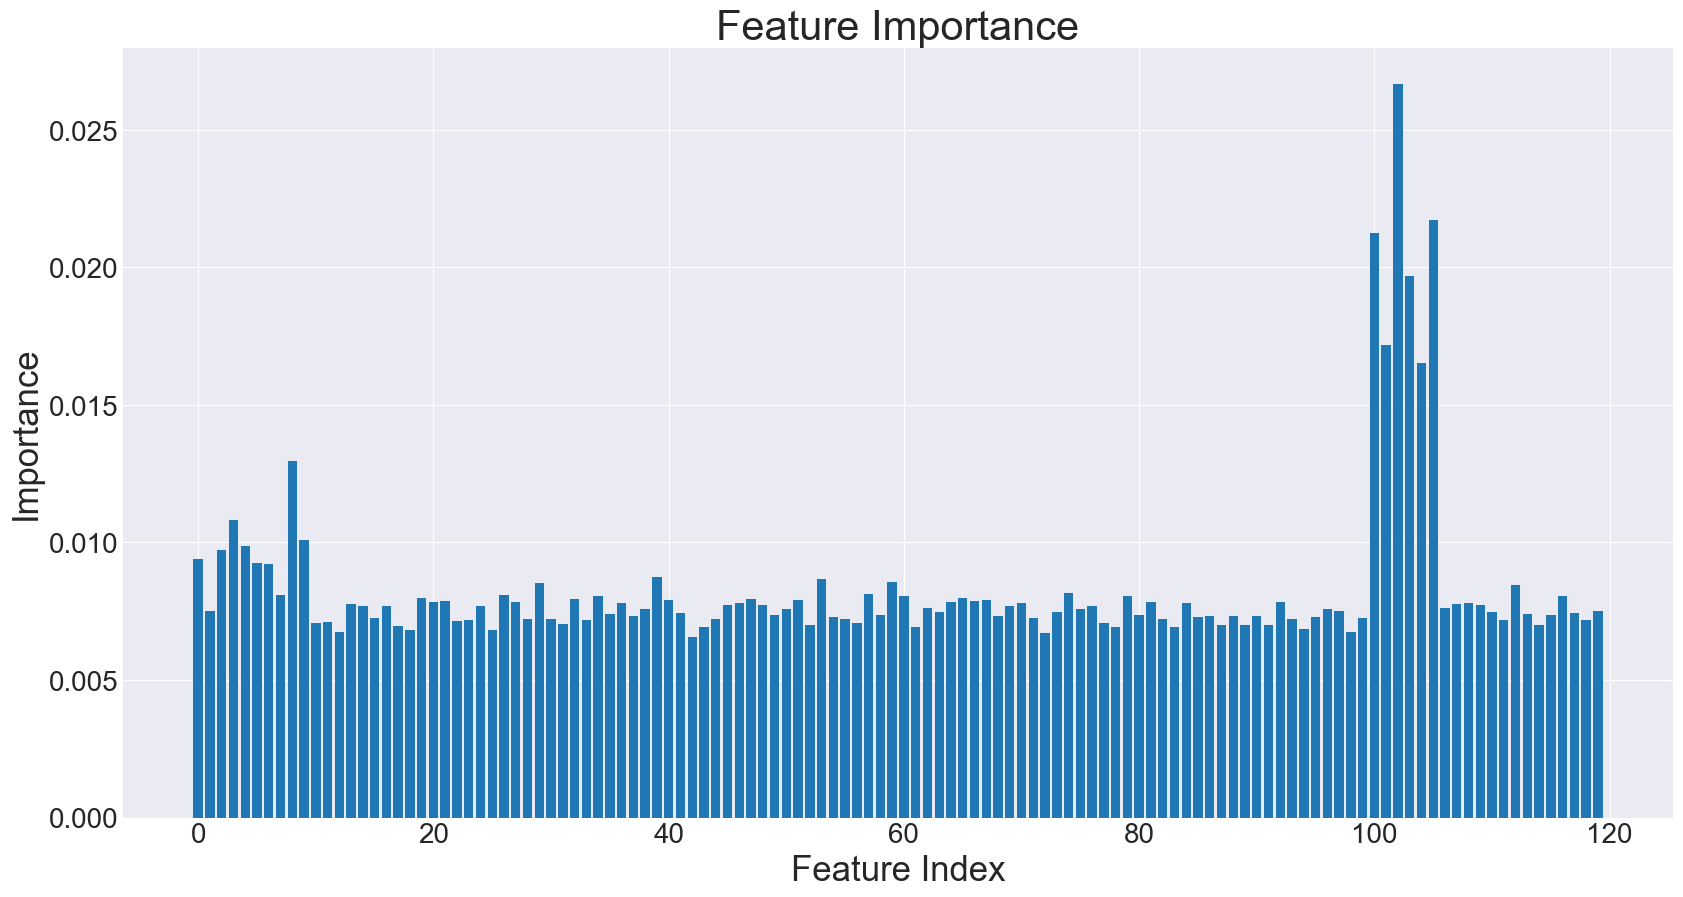

In [266]:
plt.figure(figsize=(20, 10))
importance = rf_first_120_features.feature_importances_
plt.bar(range(len(importance)), importance)
plt.title("Feature Importance", fontsize=30)
plt.xlabel("Feature Index", fontsize=25)
plt.ylabel("Importance", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

#### what are the distributions of variables with high importance?

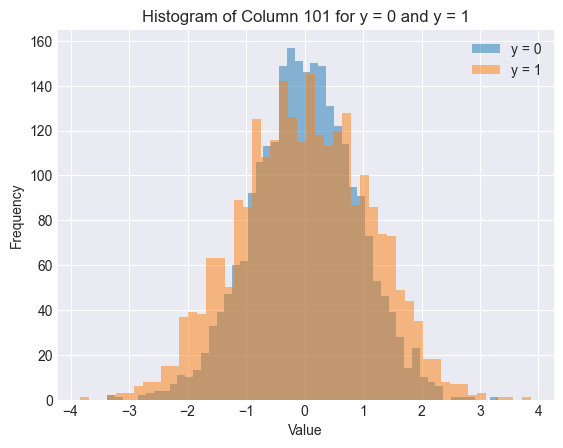

In [295]:
col = 101
plt.hist(train[train["y"] == 0][col], bins=50, alpha=0.5, label="y = 0")
plt.hist(train[train["y"] == 1][col], bins=50, alpha=0.5, label="y = 1")
plt.title(f"Histogram of Column {col} for y = 0 and y = 1")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## I'm gonna take this idea to the extreme 

In [10]:
# Split the train dataset into train and test sets

train_with_high_importance = train.iloc[:, 0:120].iloc[
    :, rf_first_120_features.feature_importances_ > 0.009
]
X_train, X_test, y_train, y_test = train_test_split(
    train_with_high_importance, train["y"], test_size=0.2, random_state=213
)

# Train a random forest model
rf = RandomForestClassifier(random_state=213, n_estimators=200)
rf.fit(X_train, y_train)

# Validate the results
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.721


In [13]:
X_train

,0,2,3,4,5,6,8,9,100,101,102,103,104,105
1268,-0.196727,0.591575,0.537857,-1.247226,-0.955436,0.020926,0.017091,-0.172292,0.895643,1.010508,-0.405496,-0.947267,-0.766075,0.501636
4102,-1.478775,-1.572923,-0.089957,-1.312961,-0.257649,-0.565535,-0.361728,1.269523,-1.104419,1.102099,-1.659067,0.791925,-1.041256,0.464338
938,-5.294987,-5.029614,-3.735676,-3.756872,-2.906849,-4.570431,-4.443124,-2.154597,-3.340442,-0.489885,-1.588790,-0.909606,-1.269037,2.338485
1429,3.640450,3.788310,1.587514,1.682344,2.022646,3.610637,2.103013,2.337306,0.764907,1.081157,1.053052,-0.330680,0.606916,1.391438
1666,-0.397607,-1.441360,-1.708304,-0.561965,-0.227386,0.102588,-1.345820,-0.657453,-0.065004,-1.561968,-0.763435,1.186477,0.089253,-0.337408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,3.086856,2.374641,4.062694,-0.056904,2.664160,3.195847,2.709002,0.649944,2.188942,0.609822,-1.728667,-1.129958,0.952774,1.141930
3817,-3.178640,-2.587431,-2.368808,-3.421654,-2.774348,-3.033849,-3.049616,-3.113319,-0.274212,-0.842155,-0.918118,-1.700630,0.171158,0.464596
2859,0.589370,0.000022,0.992957,-1.136439,0.452955,0.659644,0.128269,-0.508605,0.490428,0.423699,-0.782915,-1.351804,0.946302,0.350135
1025,0.111674,-0.957508,0.681960,0.119462,-0.376312,-0.356349,-0.646986,0.351538,-1.425470,0.886040,0.108190,-1.354834,-1.453539,1.411826


# Trying svm

In [352]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
accuracy = svm.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.726


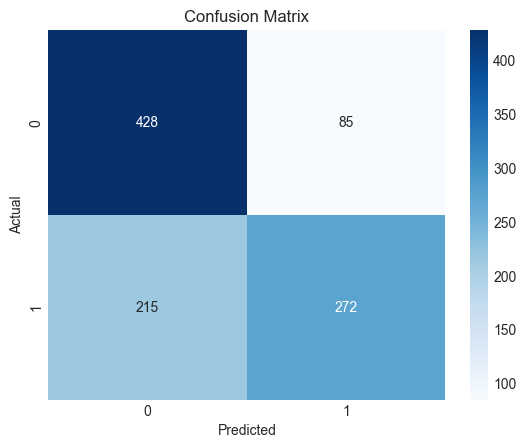

In [366]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

decisions = svm.decision_function(X_test)
y_pred = decisions > 0.3
cm = confusion_matrix(y_test, y_pred)


import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

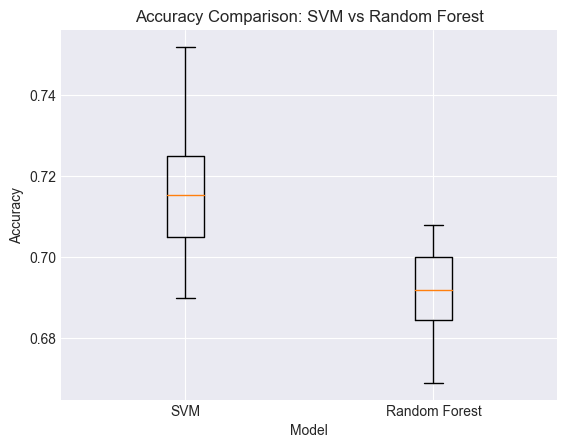

CPU times: user 1min 54s, sys: 1.07 s, total: 1min 55s
Wall time: 1min 57s


In [346]:
%%time

random.seed(42)
random_states = [random.randint(0, 10000) for i in range(40)]
random_states

accuracies_svm = []
accuracies_rf = []

for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(
        train_with_high_importance, train["y"], test_size=0.2, random_state=random_state
    )

    # Train a random forest model
    rf = RandomForestClassifier(random_state=213, n_estimators=200)
    rf.fit(X_train, y_train)

    # Validate the results
    accuracy = rf.score(X_test, y_test)
    accuracies_rf.append(accuracy)


    svm = SVC()
    svm.fit(X_train, y_train)
    accuracy = svm.score(X_test, y_test)
    accuracies_svm.append(accuracy)

plt.boxplot([accuracies_svm, accuracies_rf])
plt.xticks([1, 2], ['SVM', 'Random Forest'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: SVM vs Random Forest')
plt.show()

svm gives better results, although both algorithms have default parameters, I also tried xgboost but with default parameters results were poorly (0.66) as expected, Pawel Tesser said that is typical behavior

## svm on full data 

In [354]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    train.drop("y", axis=1), train["y"], test_size=0.2, random_state=213
)

svm_full = SVC()
svm_full.fit(X_train_all, y_train_all)
accuracy = svm_full.score(X_test_all, y_test_all)
print("Accuracy:", accuracy)

Accuracy: 0.502
